# Step 1
We start off by importing some useful libraries:
1. Numpy- Python's scientific math library that is useful for carrying out complex math operations on given data
2. Matplotlib- Python's data visualisation library useful for building plots, histograms, charts and other forms of visual data
3. Pandas- Python's data manipulation library that is useful for dealing with datasets and manipulating data using Dataframes

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# Step 2

Let's talk about the dataset first up. It contains three csv files:
1. Covid 19 Testing Numbers by State (overall)
2. Covid 19 Test Numbers across the United States (overall)
3. Day to Day Covid 19 Tracking numbers 

We start off by importing the first dataset which contains the Covid 19 Testing Numbers by State (overall). To do this we use the *read_csv()* function in the Pandas library that "reads" the data in the CSV file and converts it to a Data frame. We then print this to get a look at what the data looks like! 

In [ ]:
data_1 = pd.read_csv('/kaggle/input/cvoid-19-testing-tracking-in-states/Covid 19 Testing in States/1_covid_tracking_project_testing_numbers_and_covid_deaths_by_state.csv')
print(data_1)

# Step 3
We now want to look over some general statistics for the dataset. We use the *describe()* function of the Pandas library to do this. As shown in the output below, the function gives us general statistics for each of the columns including the count, mean, median, maximum, minimum and each of the quartiles. This helps us achieve a more generalized view of the entire dataset.

In [ ]:
data_1.describe()

# Step 4

We now look into some plots that give us a visual representation of the dataset: 

1. We first start off by looking at a bar graph for the first 10 states in the dataframe comparing their populations. To achieve this, we use Matplotlib.pyplot as our library and use the *figure()* function to create a figure of 20x10 square inches. We then use the *bar()* function to create a bar graph of only the first 10 US States on the dataset. *title()*, *xlabel()*, and *ylabel()* are used to add the title, x axis label and y axis label respectively.
2. We do the same to draw a bar graph for the number of positive Covid 19 cases in the first 10 US States using the same procedures.

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(data_1['state'][:10], data_1['total_population'][:10])
plt.title('Population of Some US States')
plt.xlabel('US States')
plt.ylabel('Population (in 10 million people)')

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(data_1['state'][:10], data_1['total_test_results'][:10])
plt.title('Total Positive Cases in first 10 States')
plt.xlabel('US States')
plt.ylabel('Number of Positive Cases (in order of 10 millions)')

# Step 5
We now move on to the third dataset containing the day to day tracking history of the US States' Covid 19 cases. This data set will be able to provide us with much more in depth information about the trends in the US' Covid 19 cases and thus, help us in building our Machine Learning model later on. First, we read the dataset just like the previous one using *read_csv* and print it.

In [6]:
data_2 = pd.read_csv('/kaggle/input/cvoid-19-testing-tracking-in-states/Covid 19 Testing in States/3_covid_tracking_project_historical_testing_numbers_and_covid_deaths_by_state.csv')
print(data_2)

         state                 date  total_population  \
0       Alaska  2020-03-06 00:00:00            737438   
1       Alaska  2020-03-07 00:00:00            737438   
2       Alaska  2020-03-08 00:00:00            737438   
3       Alaska  2020-03-09 00:00:00            737438   
4       Alaska  2020-03-10 00:00:00            737438   
...        ...                  ...               ...   
16093  Wyoming  2021-01-06 00:00:00            577737   
16094  Wyoming  2021-01-07 00:00:00            577737   
16095  Wyoming  2021-01-08 00:00:00            577737   
16096  Wyoming  2021-01-09 00:00:00            577737   
16097  Wyoming  2021-01-10 00:00:00            577737   

       cumulative_total_test_results  cumulative_total_test_results_per_1000  \
0                                8.0                                0.010848   
1                               12.0                                0.016273   
2                               14.0                                0.01898

# Step 6
We now create a plot for New York's cumulative covid 19 case record. We start off by converting the 'date' column in the data_2 data frame to a pandas datetime object to enable us to plot it effectively. Next, we sort out all rows that have 'New York' in their 'state' columns and then create a 30x12 square inches figure. We plot the date vs cumulative positive tests and add the title, x-axis label and the y-axis label respectively.

We do the same for the increase in positive test cases in New York in the next plot.

Text(0, 0.5, 'Number of cases (in order of 1 million)')

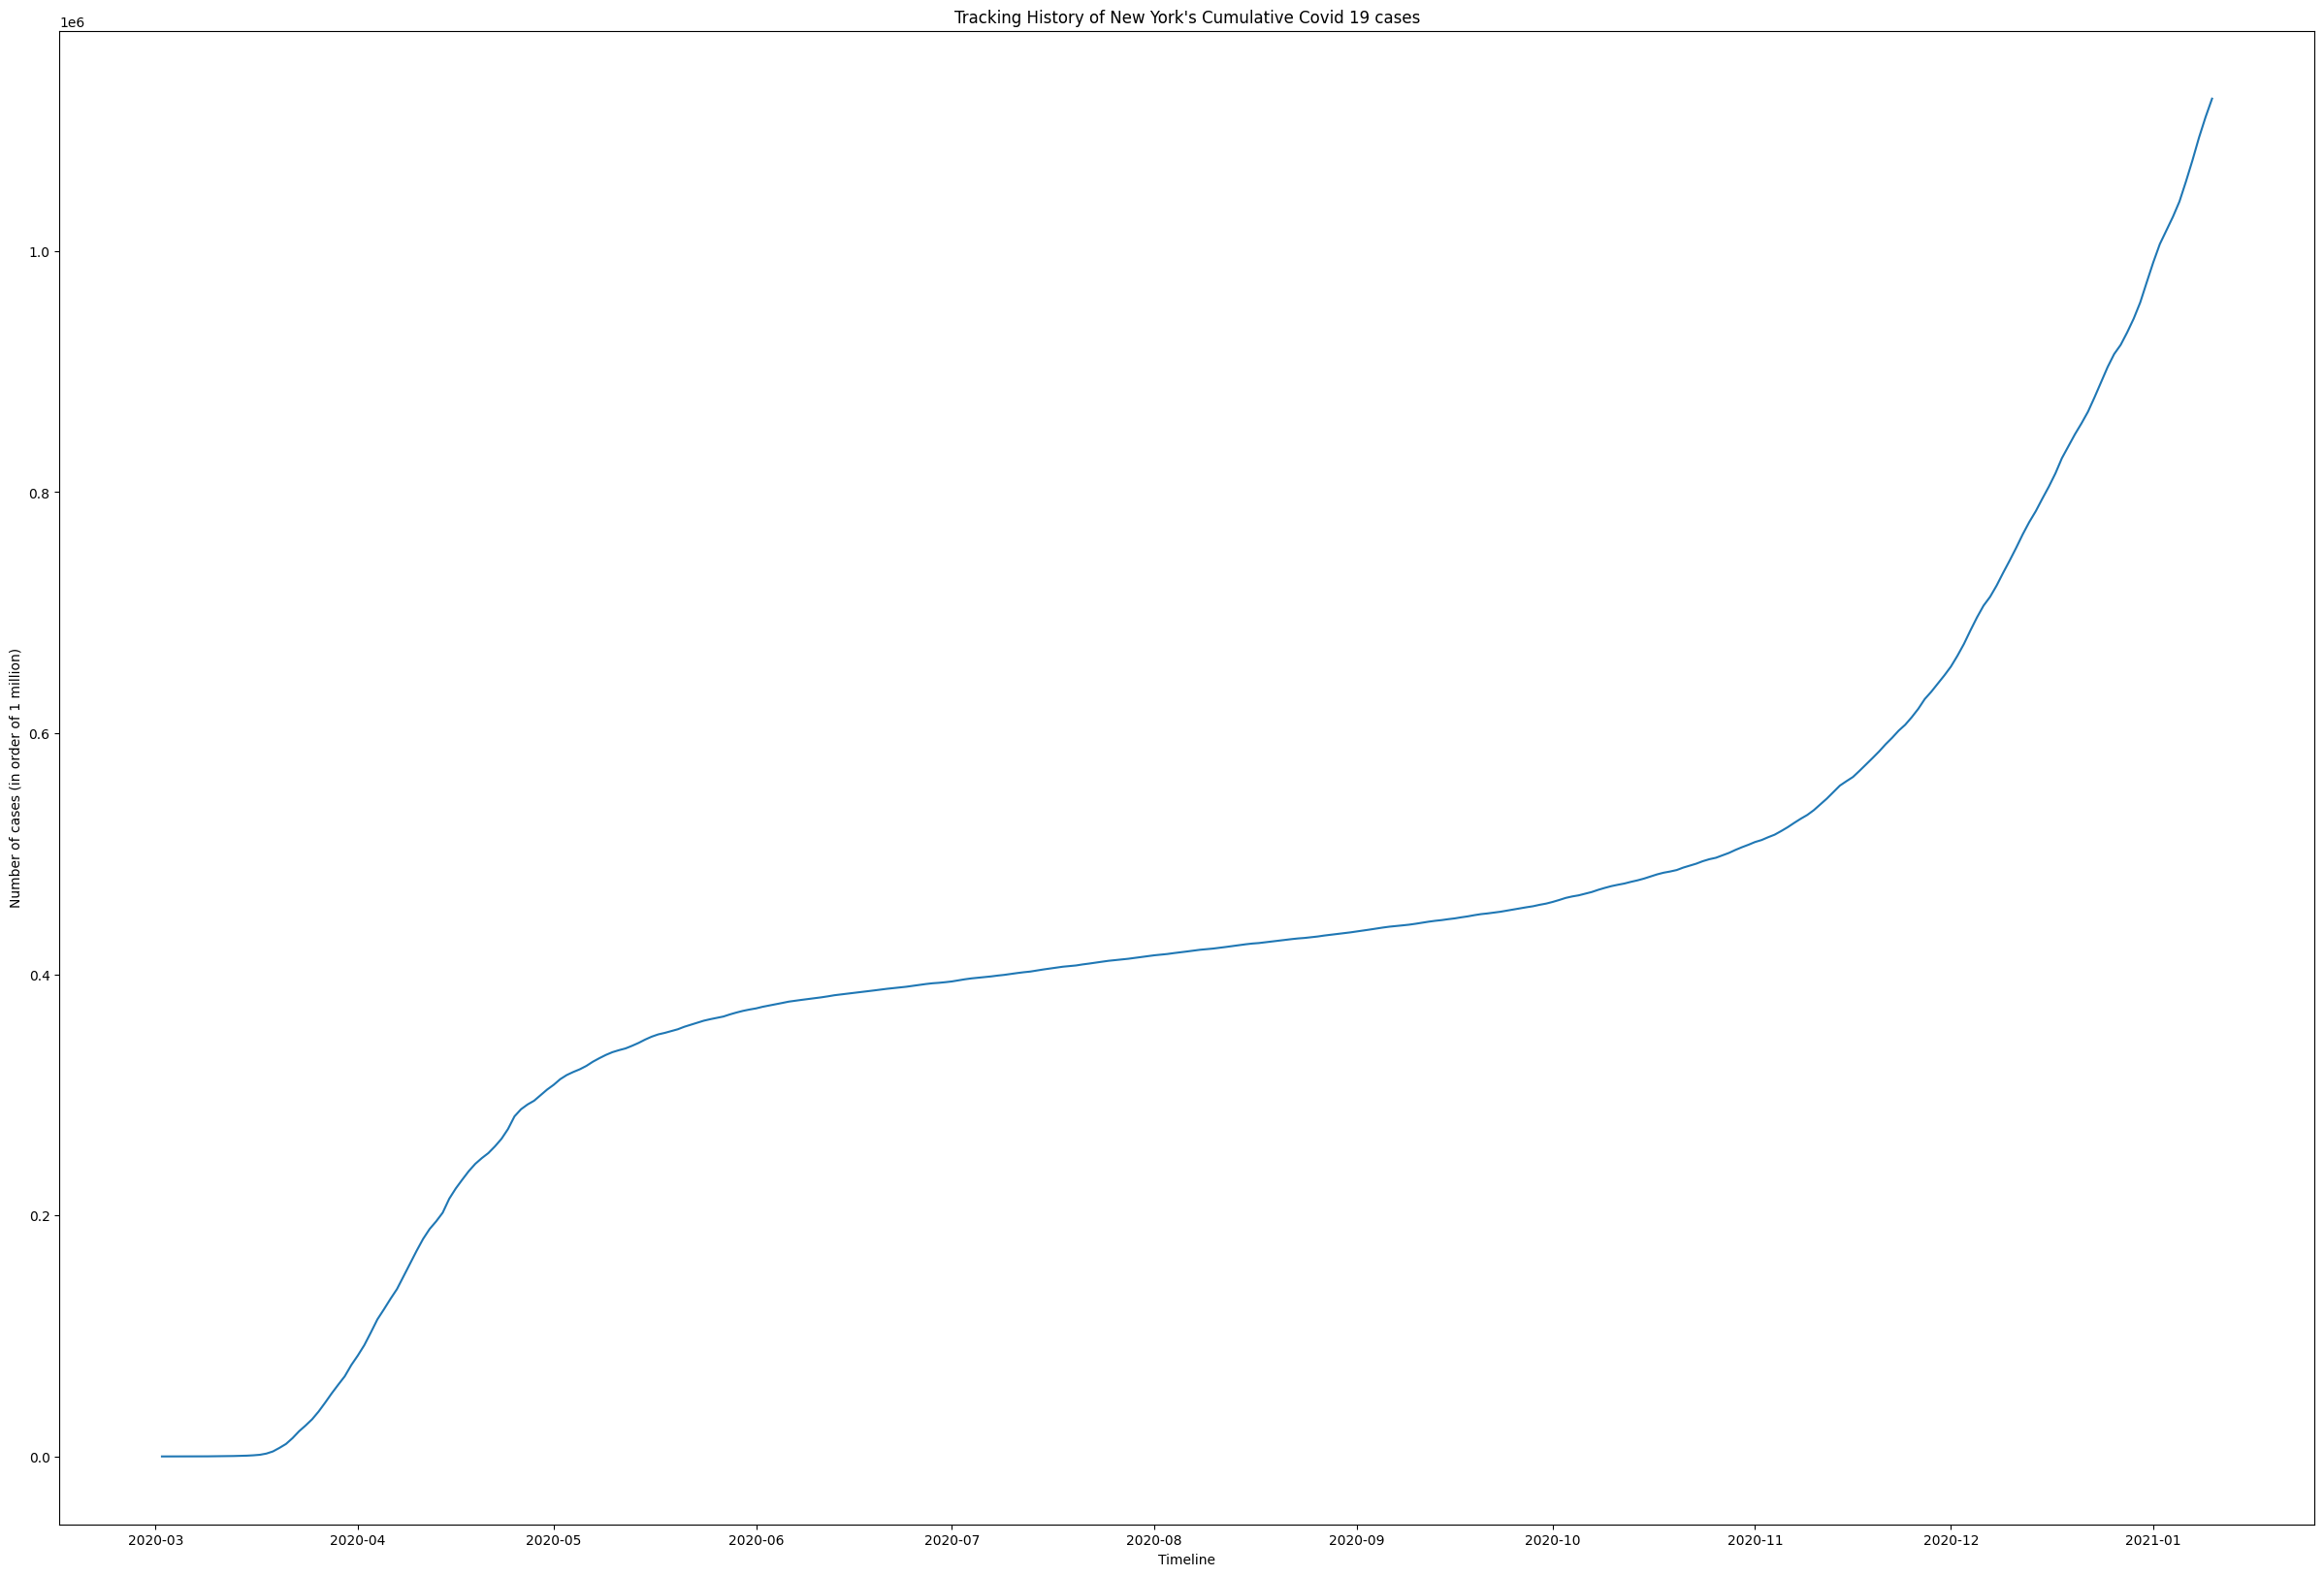

In [7]:
data_2['date']=pd.to_datetime(data_2['date'])
df=data_2[data_2['state']=='New York']
plt.figure(figsize=(30,20))
plt.plot(df['date'],df['cumulative_positive_tests'])
plt.title('Tracking History of New York\'s Cumulative Covid 19 cases')
plt.xlabel('Timeline')
plt.ylabel('Number of cases (in order of 1 million)')

Text(0, 0.5, 'Increase in Positive Test Cases')

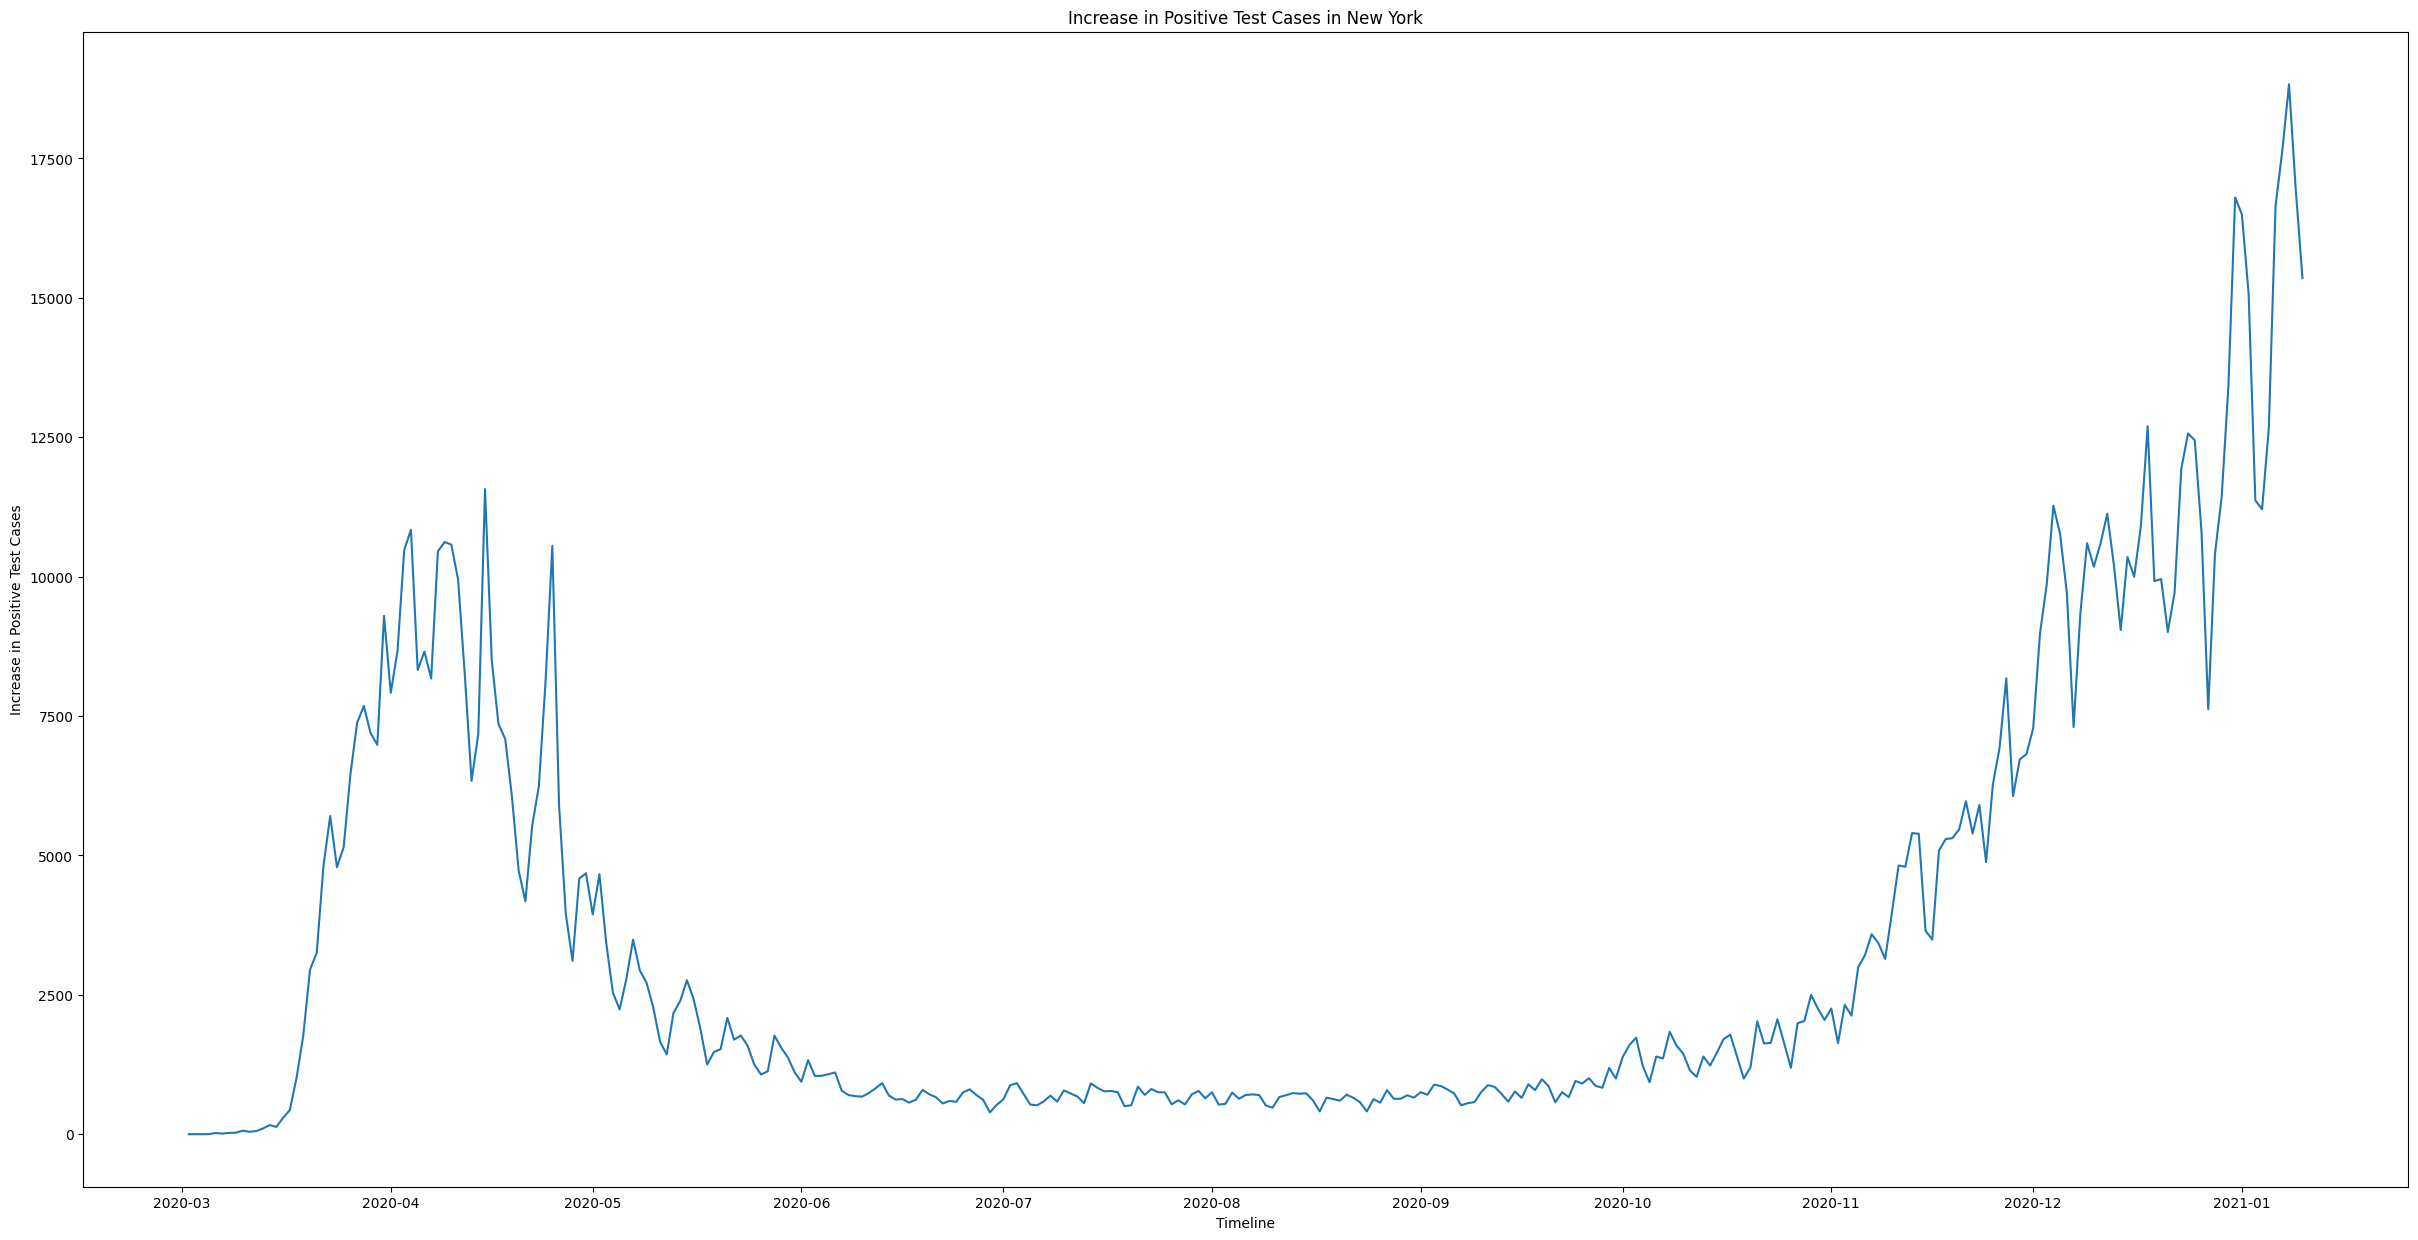

In [8]:
plt.figure(figsize=(30,15))
plt.plot(df['date'],df['positive_tests_increase'])
plt.title('Increase in Positive Test Cases in New York')
plt.xlabel('Timeline')
plt.ylabel('Increase in Positive Test Cases')

# Step 7

Now I tried to generate a heat map depicting the concentration of the Covid 19 cases across the United States based on different states. We first start off by reading the dataset containing the covid 19 numbers by state and create a shapefiles of the United States' territories using the *read_file()* function in the Geopandas library. We then merge the two using the *merge()* function such that the 'NAME' column in the shapefile and the 'state' column in the dataset are commonly merged. We then create the heatmap of the US states depicting the states and their covid 19 cases (as shown in the colorbar added)

In [10]:
data_3=pd.read_csv('/kaggle/input/cvoid-19-testing-tracking-in-states/Covid 19 Testing in States/1_covid_tracking_project_testing_numbers_and_covid_deaths_by_state.csv')
us_states=gpd.read_file('/kaggle/input/us-states-cartographic-boundary-shapefiles/cb_2016_us_state_500k.shp')

In [66]:
print(us_states.head()) #A look into the Shapefile

  STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD          ALAND  \
0      01  01779775  0400000US01    01     AL     Alabama   00   131173688951   
1      02  01785533  0400000US02    02     AK      Alaska   00  1477946266785   
2      04  01779777  0400000US04    04     AZ     Arizona   00   294198560125   
3      05  00068085  0400000US05    05     AR    Arkansas   00   134771517596   
4      06  01779778  0400000US06    06     CA  California   00   403501101370   

         AWATER                                           geometry  
0    4593686489  MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...  
1  245390495931  MULTIPOLYGON (((-134.73726 58.26135, -134.7344...  
2    1027346486  POLYGON ((-114.81629 32.50804, -114.81432 32.5...  
3    2960191698  POLYGON ((-94.61783 36.49941, -94.61765 36.499...  
4   20466718403  MULTIPOLYGON (((-118.60442 33.47855, -118.5987...  


In [68]:
merged_data=us_states.merge(data_3, how='left', left_on='NAME', right_on='state')

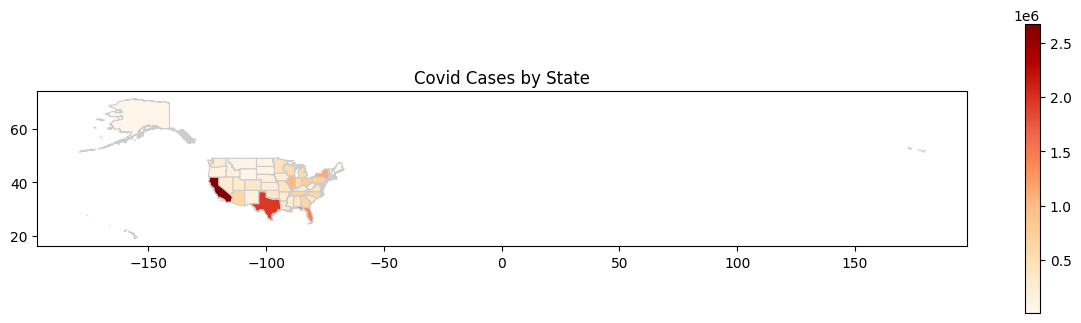

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
merged_data.plot(column='positive', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'shrink': 0.25})
plt.title('Covid Cases by State')
plt.show()

# Step 8
We now look at some Pie Charts that help us to understand the demographics of the US States' share in total population and total covid 19 cases. We start off by getting our labels which in this case is the US States' name. We then get the sizes by converting the 'total_population' column in the dataset to a numpy array. Using the *pie()* function, we create a piechart showcasing the populations of different US States. The same procedure is used for the positive cases' pie chart.

*Conclusion*- We could clearly see that US States with a larger population had a larger number of Covid 19 cases compared with US states with a lower population (an expected logical result).

Text(0.5, 1.0, 'Pie Chart depicting the Population of various US States')

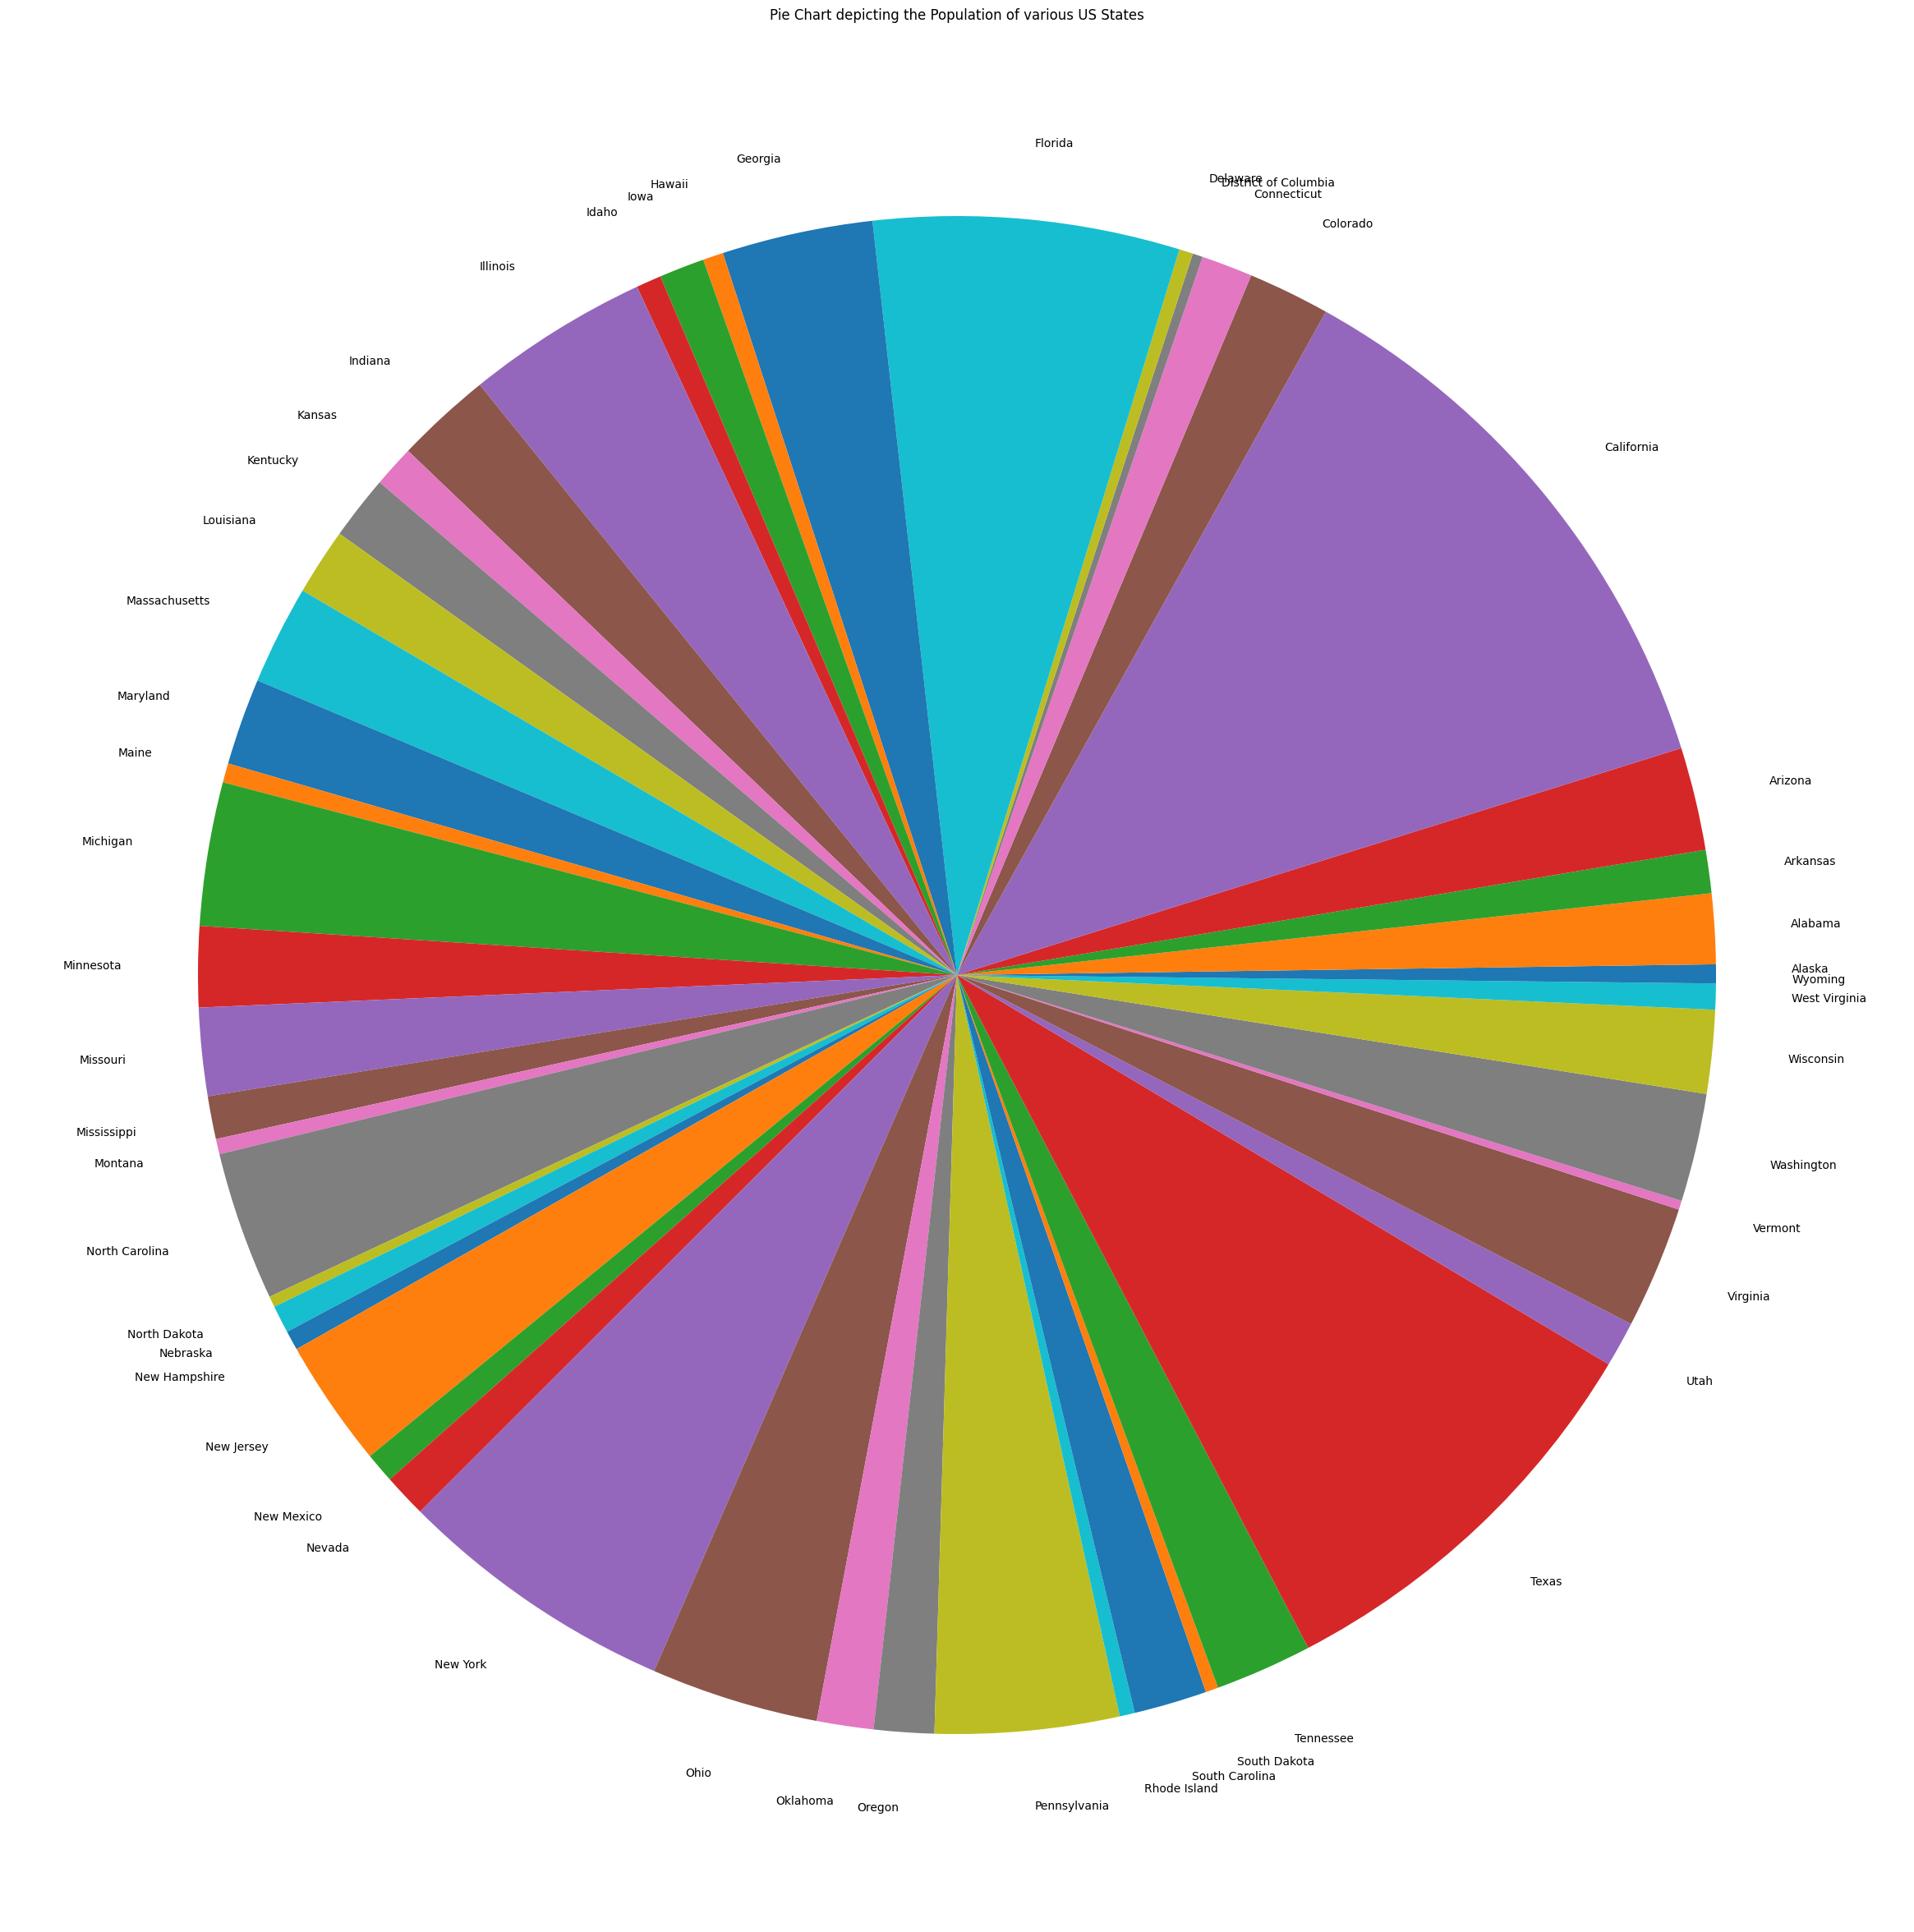

In [23]:
labels = data_3['state']
sizes = data_3['total_population'].to_numpy();
plt.figure(figsize=(30,30))
plt.pie(sizes, labels=labels)
plt.title('Pie Chart depicting the Population of various US States')

Text(0.5, 1.0, 'Covid 19 Cases in the US Statewise')

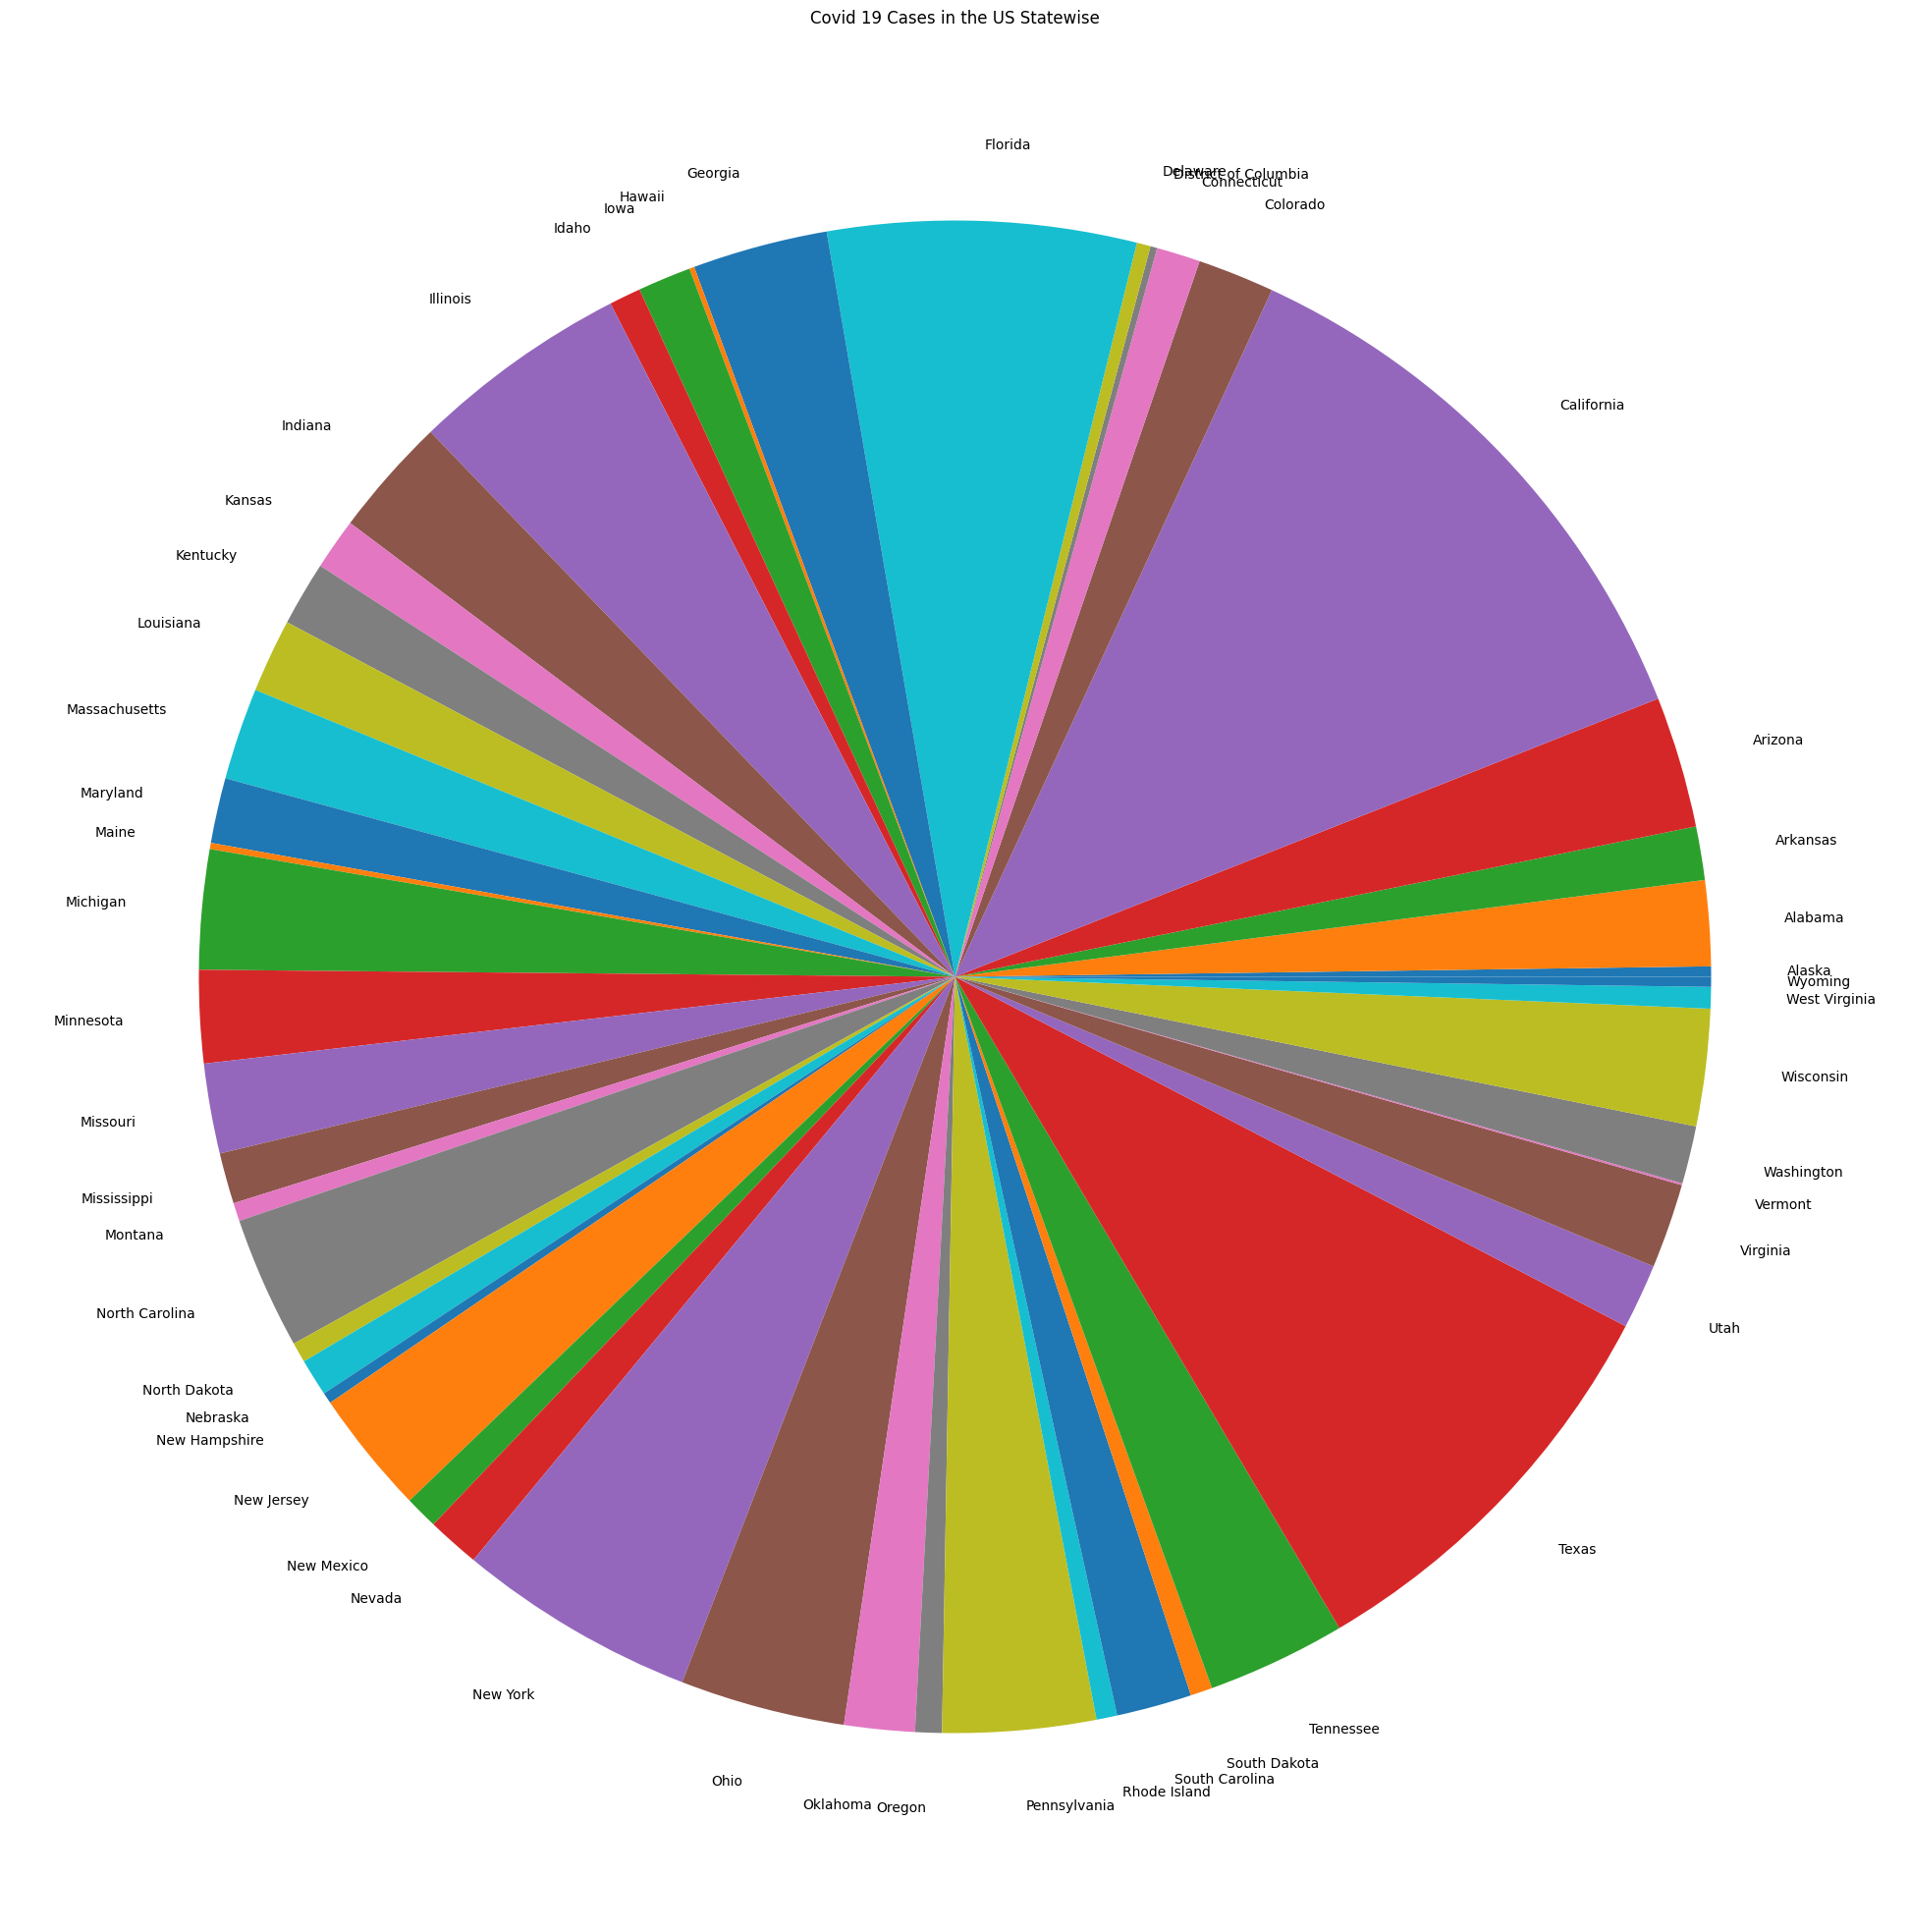

In [24]:
labels = data_3['state']
sizes = data_3['positive'].to_numpy();
plt.figure(figsize=(25,25))
plt.pie(sizes, labels=labels)
plt.title('Covid 19 Cases in the US Statewise')

# Additions to work on for the data set

1. Vaccination Progress- Comparing the day to day vaccination progress alongside the cases records to understand how the pandemic evolved across different stages
2. Case Fatality Rate (CFR) Over Time: Plot the Case Fatality Rate (number of deaths divided by the number of confirmed cases) over time to understand how lethal the virus has been at different stages.

# Long Term Goals
1. Machine Learning model to predict the covid 19 cases on a specific day
2. Economic Impact Analysis: Explore the economic impact of COVID-19 by creating charts that depict unemployment rates, GDP changes, or stock market trends during different phases of the pandemic.
3. Strain-specific Analysis: If data is available, analyze the impact of different COVID-19 strains by creating comparative graphs to show how each strain has spread over time.
4. Understanding how emergence of different strains and variants of the Covid 19 virus caused a spike in cases and using Machine Learning to predict future waves of the pandemic.

# Daily Goals
1. Add at least 2 sections a day for the next few weeks to acheive the above goals